## EDA Analysis
Table iar_ocupaciones

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
def millions(x, pos):
    return f'{x * 1e-6:.1f}M'  # Convert to millions and format with one decimal place


def graph(x1, y1, ylabel1, y2, ylabel2):
    fig, ax = plt.subplots(2, 1, figsize=(24, 10), sharex=True)

    # Plot the first line and keep the title
    ax[0].plot(x1, y1, color='blue', label=ylabel1, marker='o', linestyle='-', linewidth=2)
    ax[0].set_title(f'{ylabel1} Over Time')
    ax[0].set_xlabel('')  # Remove x-axis label
    ax[0].set_ylabel('')  # Remove y-axis label
    ax[0].yaxis.set_major_formatter(FuncFormatter(millions))  # Apply the formatter to the y-axis (optional)
    ax[0].tick_params(axis='both', which='both', bottom=False, top=False,
                      left=False, right=False, labelbottom=False, labelleft=False)
    ax[0].grid(False)
    ax[0].legend()

    # Plot the second line and keep the title
    ax[1].plot(x1, y2, color='red', label=ylabel2, marker='o', linestyle='-', linewidth=2)
    ax[1].set_title(f'{ylabel2} Over Time')
    ax[1].set_xlabel('')  # Remove x-axis label
    ax[1].set_ylabel('')  # Remove y-axis label
    ax[1].yaxis.set_major_formatter(FuncFormatter(millions))  # Apply the formatter to the y-axis (optional)
    ax[1].tick_params(axis='both', which='both', bottom=False, top=False,
                      left=False, right=False, labelbottom=False, labelleft=False)
    ax[1].grid(False)
    ax[1].legend()

    # Remove any spacing that may have been allocated for axis labels
    plt.subplots_adjust(left=0, right=1, top=0.95, bottom=0.05)

    # Show the plot
    plt.show()

def histogram(column, label, threshold=0):
    plt.figure(figsize=(24, 6))
    columna = column.value_counts()

    # less_than = columna[columna < threshold].sum()
    main = columna[columna >= threshold]

    # pd.concat([main, pd.Series({'Other': less_than})]).plot(kind='bar', color='skyblue', edgecolor='black')
    main.plot(kind='bar', color='skyblue', edgecolor='black')

    # Add title and labels
    plt.title(f'Occurrences of Each Factor in {label}')
    plt.xlabel(label)
    plt.ylabel('Count')

    # Show the plot
    plt.show()

In [3]:
df2 = pd.read_csv("iar_ocupaciones.csv")

In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3405916 entries, 0 to 3405915
Data columns (total 56 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   Fecha_hoy                object 
 1   ID_Entidad_Fed           int64  
 2   ID_Agencia               int64  
 3   ID_Tipo_Habitacion       int64  
 4   ID_canal                 int64  
 5   ID_Programa              int64  
 6   ID_Paquete               int64  
 7   ing_hab                  float64
 8   aa_ing_hab               float64
 9   ing_hab_nocoruso         float64
 10  aa_ing_hab_nocoruso      float64
 11  ing_hab_uso              float64
 12  aa_ing_hab_uso           float64
 13  ing_hab_cor              float64
 14  aa_ing_hab_cor           float64
 15  ing_hab_intercambios     float64
 16  aa_ing_hab_intercambios  float64
 17  cto_noc                  int64  
 18  aa_cto_noc               int64  
 19  cto_noc_nocoruso         int64  
 20  aa_cto_noc_nocoruso      int64  
 21  cto_noc_

In [5]:
df = df2.drop_duplicates()
df['Fecha_hoy'] = pd.to_datetime(df['Fecha_hoy'])

/var/folders/jh/wqv8k9v13k7_v10t9h68wrbh0000gn/T/ipykernel_38947/2194034033.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fecha_hoy'] = pd.to_datetime(df['Fecha_hoy'])


In [6]:
print(len(df2)) 
print(len(df))

3405916
3405284


In [7]:
abs(len(df2) - len(df))

632

In [8]:
df.columns

Index(['Fecha_hoy', 'ID_Entidad_Fed', 'ID_Agencia', 'ID_Tipo_Habitacion',
       'ID_canal', 'ID_Programa', 'ID_Paquete', 'ing_hab', 'aa_ing_hab',
       'ing_hab_nocoruso', 'aa_ing_hab_nocoruso', 'ing_hab_uso',
       'aa_ing_hab_uso', 'ing_hab_cor', 'aa_ing_hab_cor',
       'ing_hab_intercambios', 'aa_ing_hab_intercambios', 'cto_noc',
       'aa_cto_noc', 'cto_noc_nocoruso', 'aa_cto_noc_nocoruso', 'cto_noc_uso',
       'aa_cto_noc_uso', 'cto_noc_cor', 'aa_cto_noc_cor', 'ADR', 'aa_ADR',
       'otr_ing', 'aa_otr_ing', 'cto_ing_res', 'cto_age', 'cto_est',
       'ing_extras', 'ing_impuestos', 'ing_base', 'ing_exento', 'ID_empresa',
       'ID_edificio', 'num_adu', 'aa_num_adu', 'num_adu_nocoruso',
       'aa_num_adu_nocoruso', 'TREVPEC', 'aa_TREVPEC', 'num_men', 'aa_num_men',
       'num_men_nocoruso', 'aa_num_men_nocoruso', 'num_meg', 'num_inf',
       'num_jun', 'ID_Segmento_Mercado', 'ID_Segmento_Alterno',
       'ID_Segmento_Comp', 'moneda_cve', 'ID_Empresa2'],
      dtype='object'

### Group By Date

In [9]:
df.head()

,Fecha_hoy,ID_Entidad_Fed,ID_Agencia,ID_Tipo_Habitacion,ID_canal,ID_Programa,ID_Paquete,ing_hab,aa_ing_hab,ing_hab_nocoruso,...,num_men_nocoruso,aa_num_men_nocoruso,num_meg,num_inf,num_jun,ID_Segmento_Mercado,ID_Segmento_Alterno,ID_Segmento_Comp,moneda_cve,ID_Empresa2
0,2021-11-15,173,305,13,1,1,1,0.0,0.000000,0.0,...,0,0,0,0,0,6,17,34,2,7
1,2021-11-15,173,305,14,0,1,1,0.0,57.086842,0.0,...,0,0,0,0,0,6,17,34,2,7
2,2021-11-15,173,305,14,1,1,1,0.0,0.000000,0.0,...,0,0,0,0,0,6,17,34,1,7
3,2021-11-15,173,305,14,1,1,1,0.0,0.000000,0.0,...,0,0,0,0,0,6,17,34,2,7
4,2021-11-15,173,305,19,3,1,1,0.0,774.750978,0.0,...,0,0,0,0,0,6,17,34,2,7


In [10]:
# Dataframe for numerical columns and date
df_num = df[['Fecha_hoy', 'ing_hab', 'aa_ing_hab',
             'ing_hab_nocoruso', 'aa_ing_hab_nocoruso']]
df_num['monthly'] = df['Fecha_hoy'].dt.strftime('%Y-%m')
df_num = df_num.drop("Fecha_hoy", axis=1)
df_num.head()

/var/folders/jh/wqv8k9v13k7_v10t9h68wrbh0000gn/T/ipykernel_38947/687536581.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['monthly'] = df['Fecha_hoy'].dt.strftime('%Y-%m')


,ing_hab,aa_ing_hab,ing_hab_nocoruso,aa_ing_hab_nocoruso,monthly
0,0.0,0.000000,0.0,0.000000,2021-11
1,0.0,57.086842,0.0,57.086842,2021-11
2,0.0,0.000000,0.0,0.000000,2021-11
3,0.0,0.000000,0.0,0.000000,2021-11
4,0.0,774.750978,0.0,774.750978,2021-11


#### ing_hab and aa_ing_hab over time

In [11]:
df_num = df_num.groupby(by="monthly").sum()

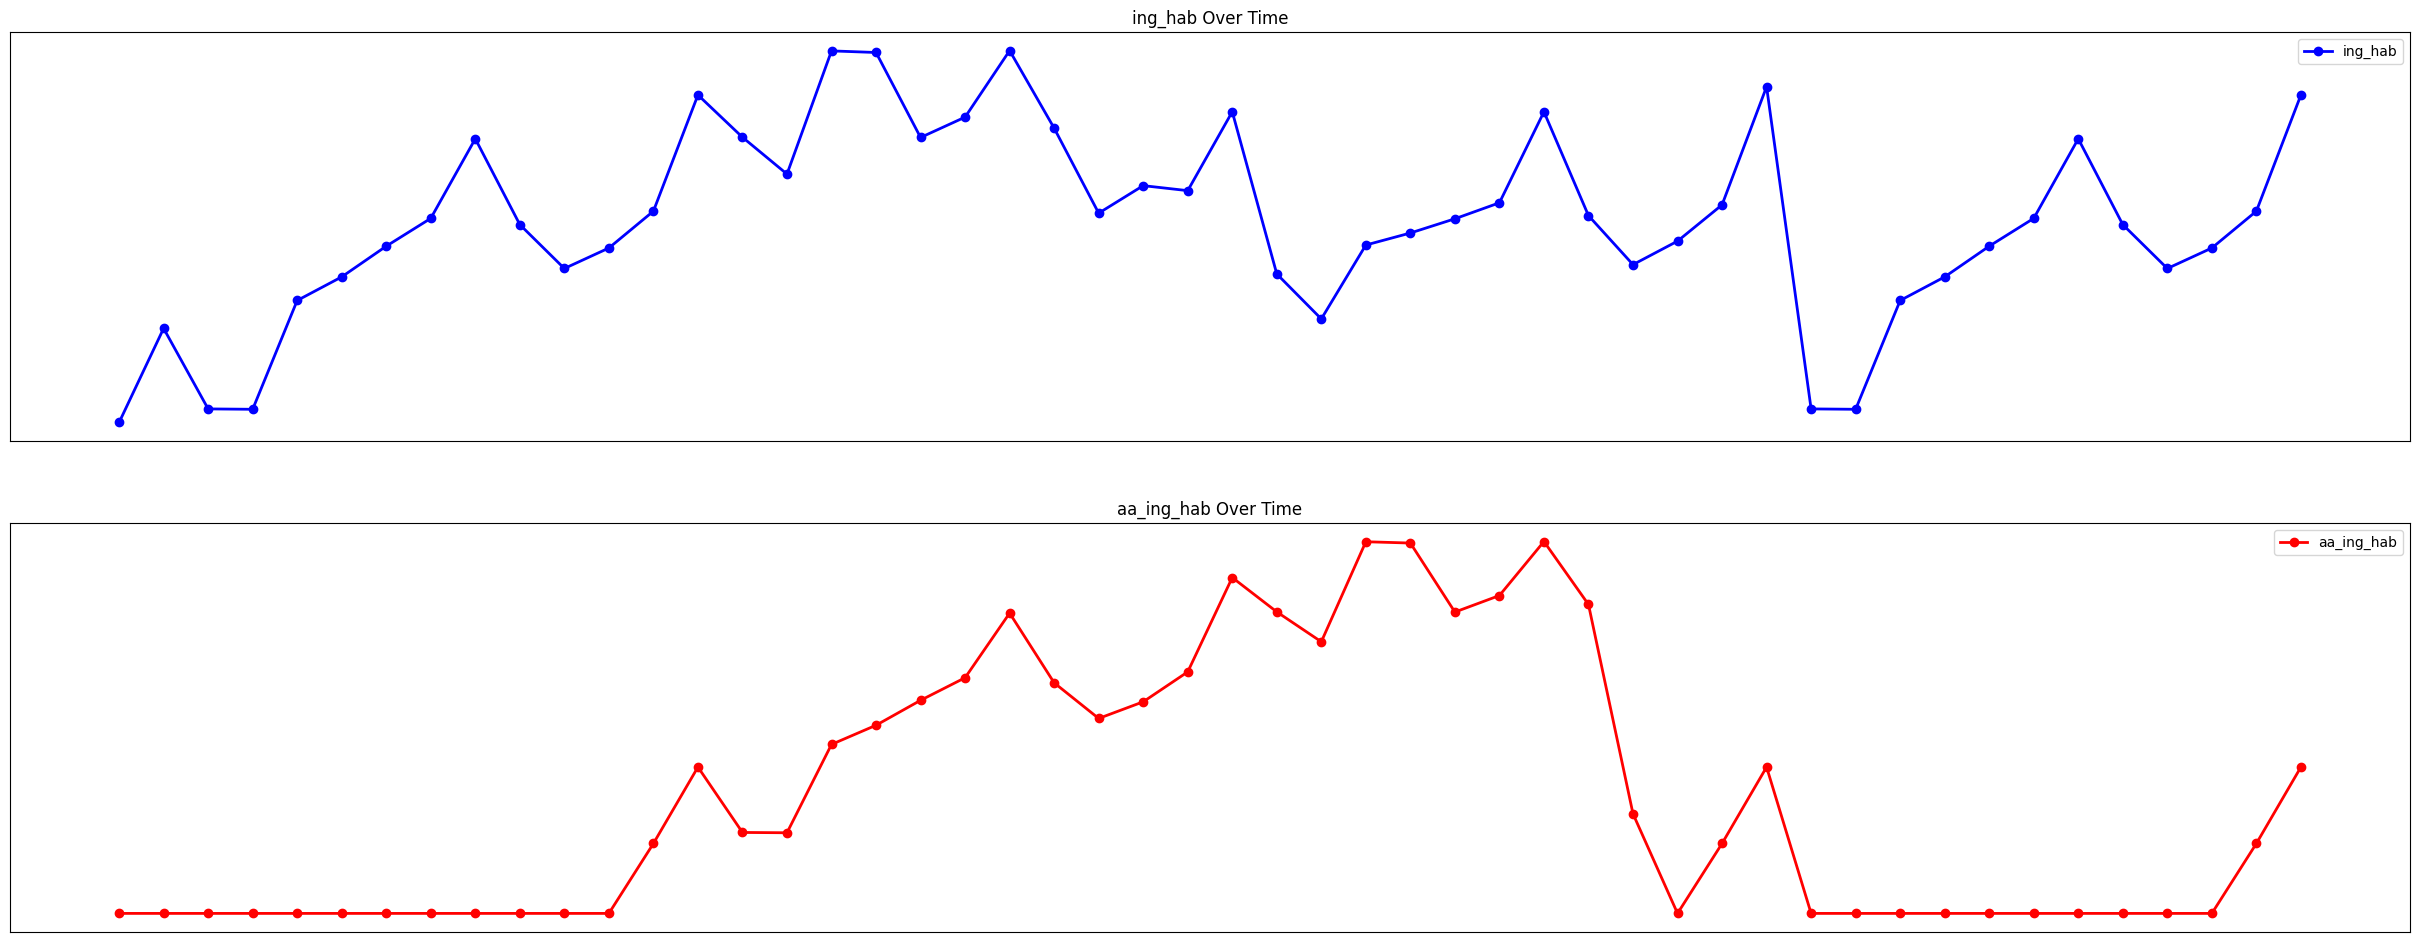

In [12]:
graph(df_num.index, df_num["ing_hab"], "ing_hab", df_num["aa_ing_hab"], "aa_ing_hab")


#### ing_hab_nocoruso and aa_ing_hab_nocoruso over time

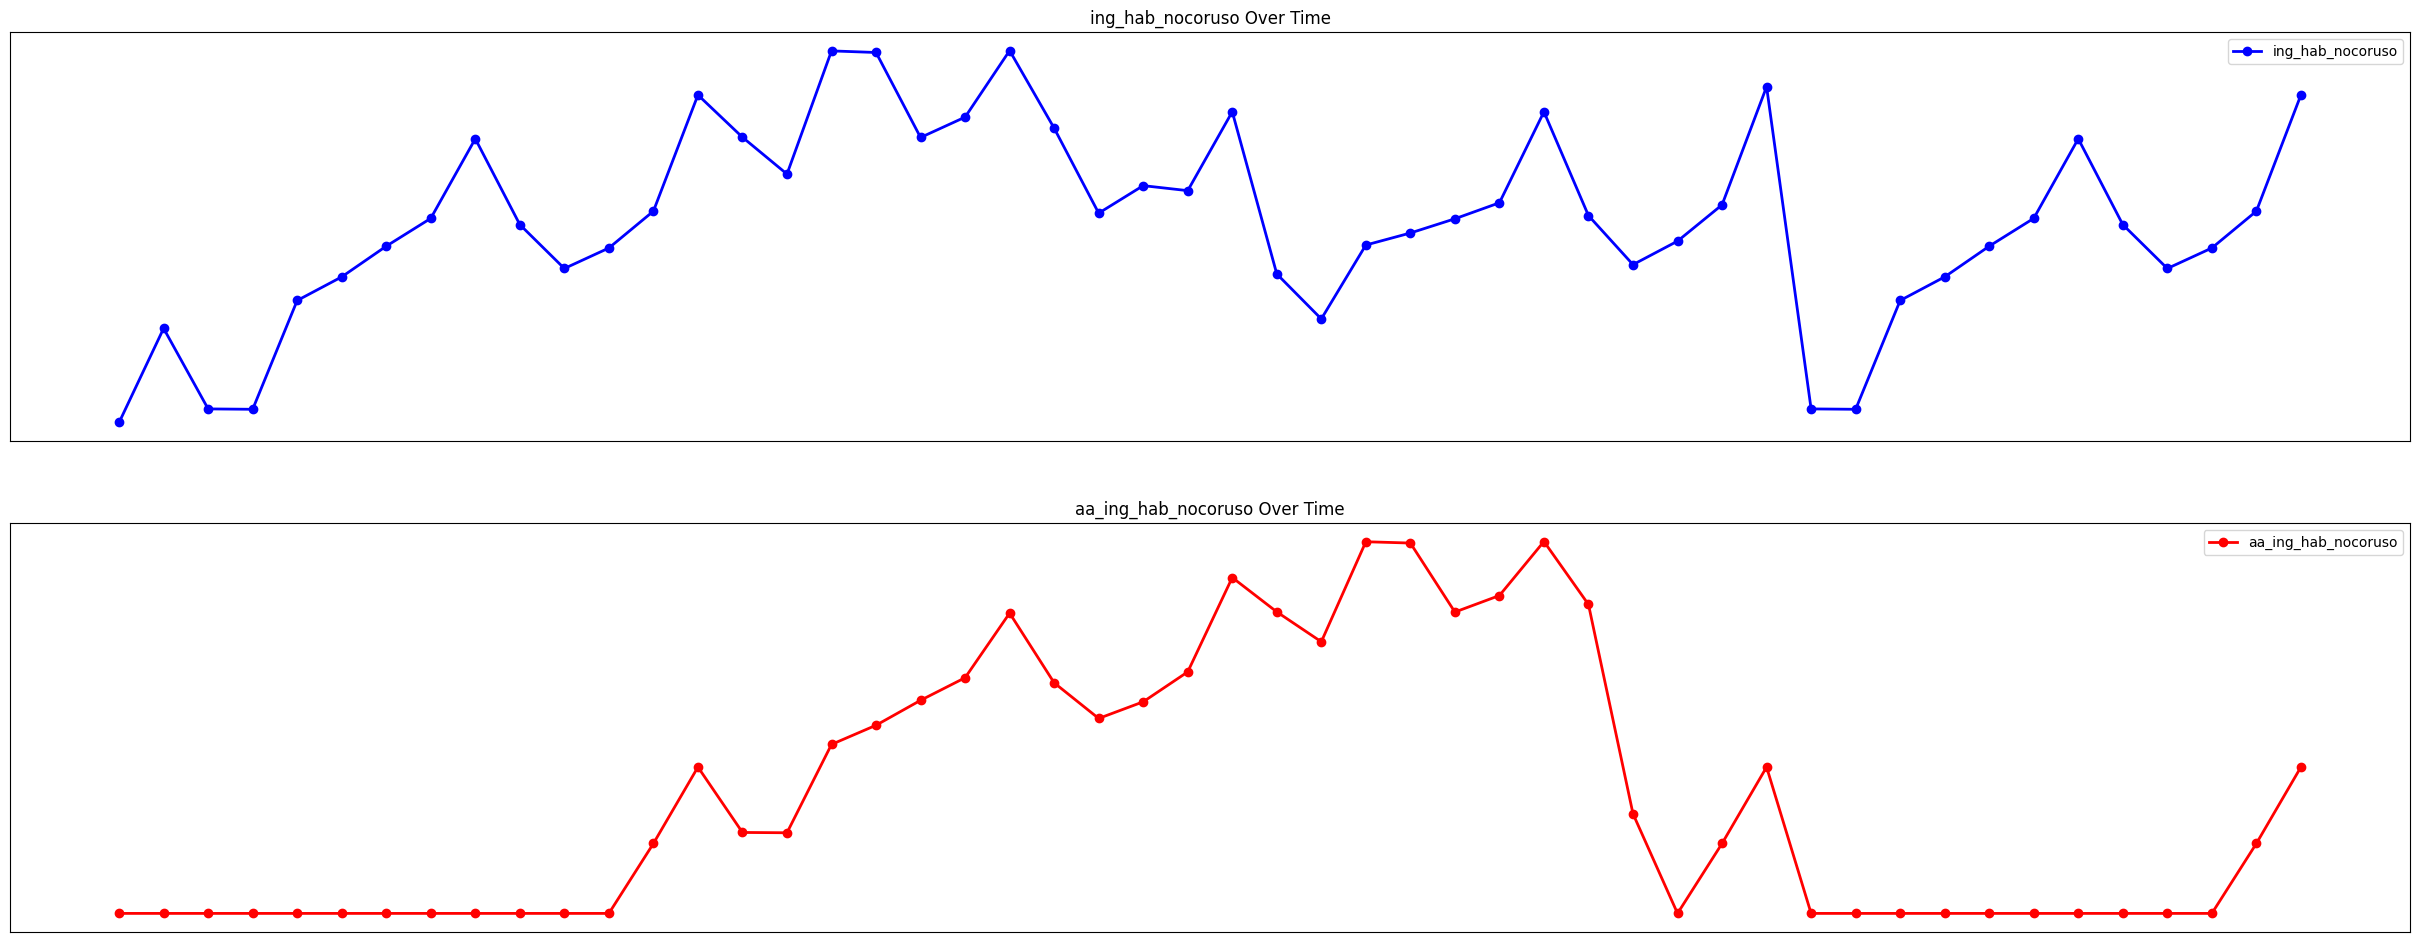

In [13]:
graph(df_num.index, df_num["ing_hab_nocoruso"], "ing_hab_nocoruso", df_num["aa_ing_hab_nocoruso"], "aa_ing_hab_nocoruso")

### Histograms

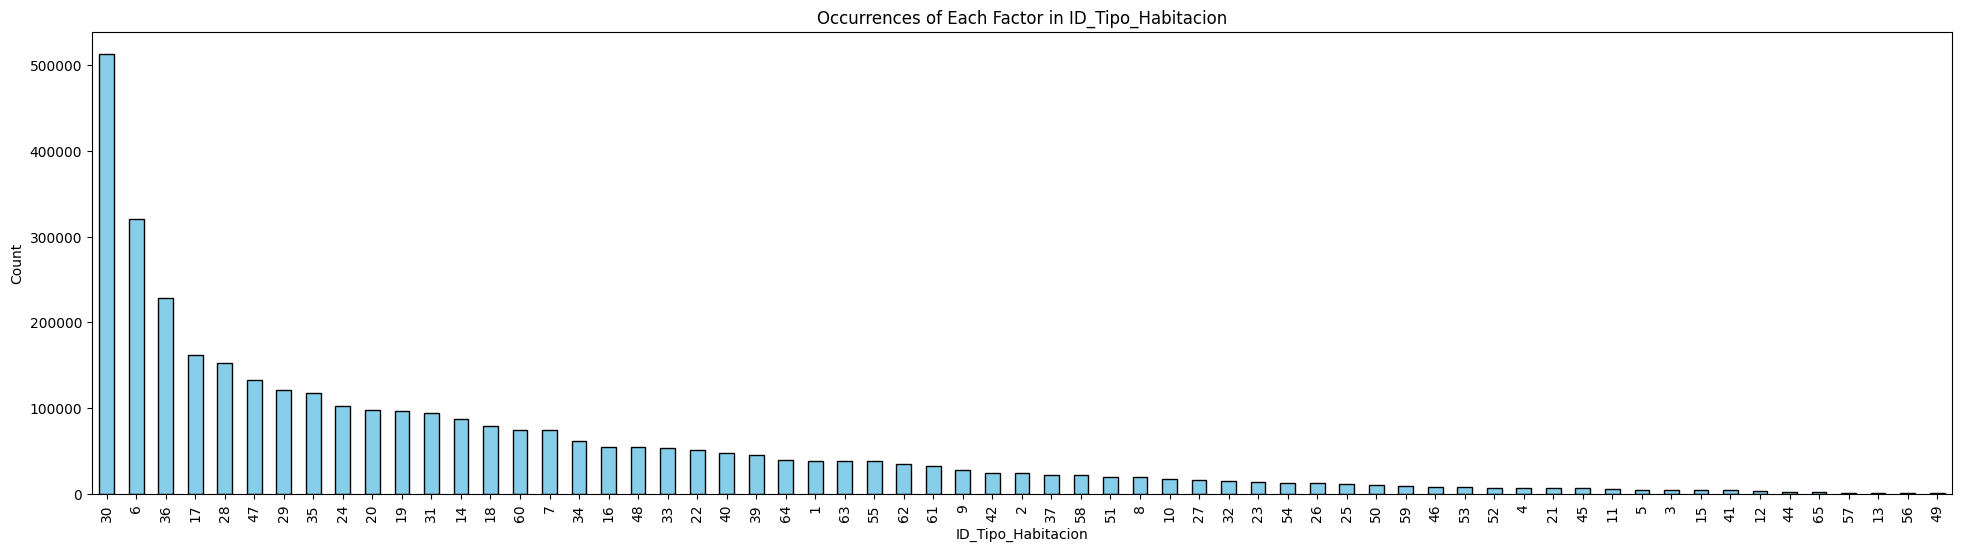

In [14]:
histogram(df["ID_Tipo_Habitacion"], "ID_Tipo_Habitacion", 1000)

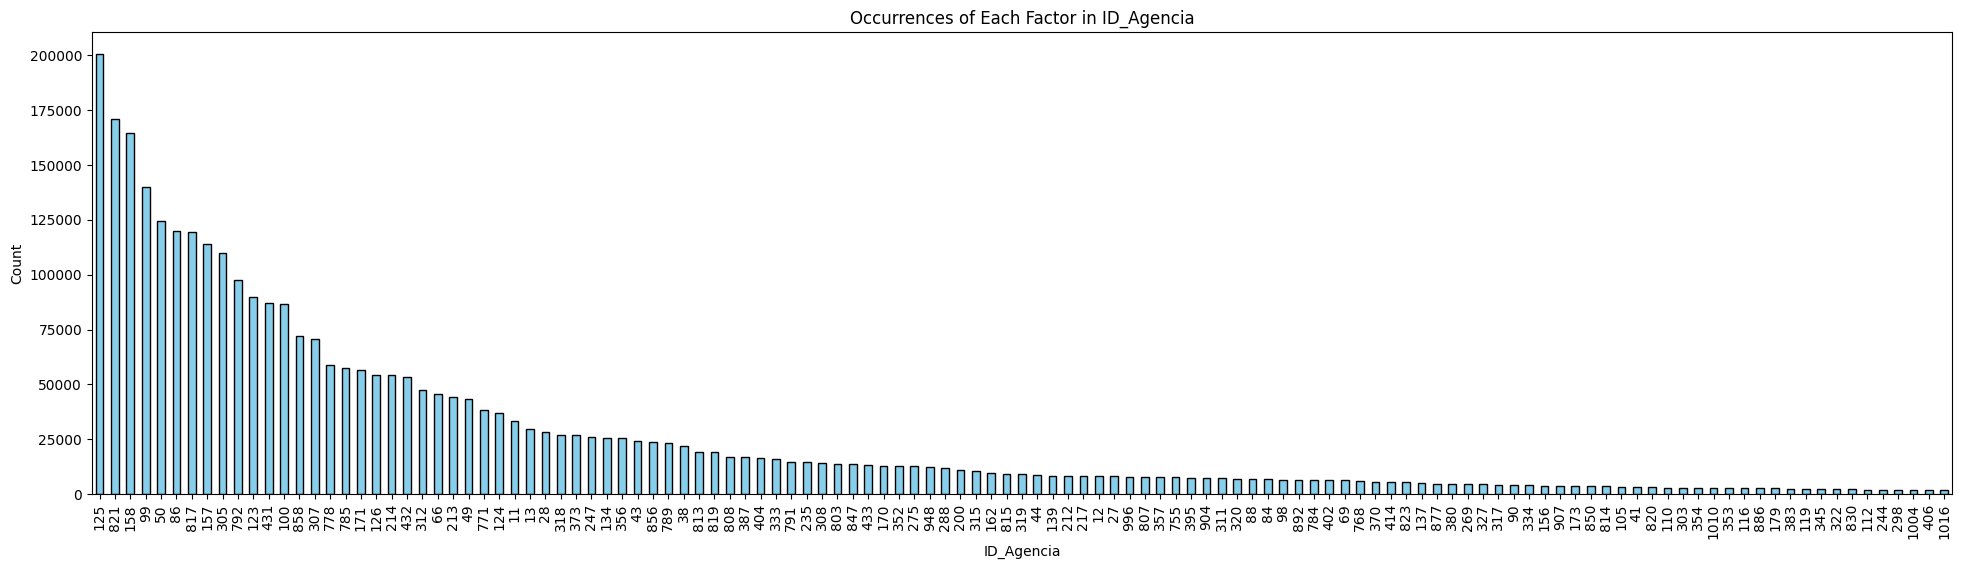

In [15]:
histogram(df["ID_Agencia"], "ID_Agencia", 2000)

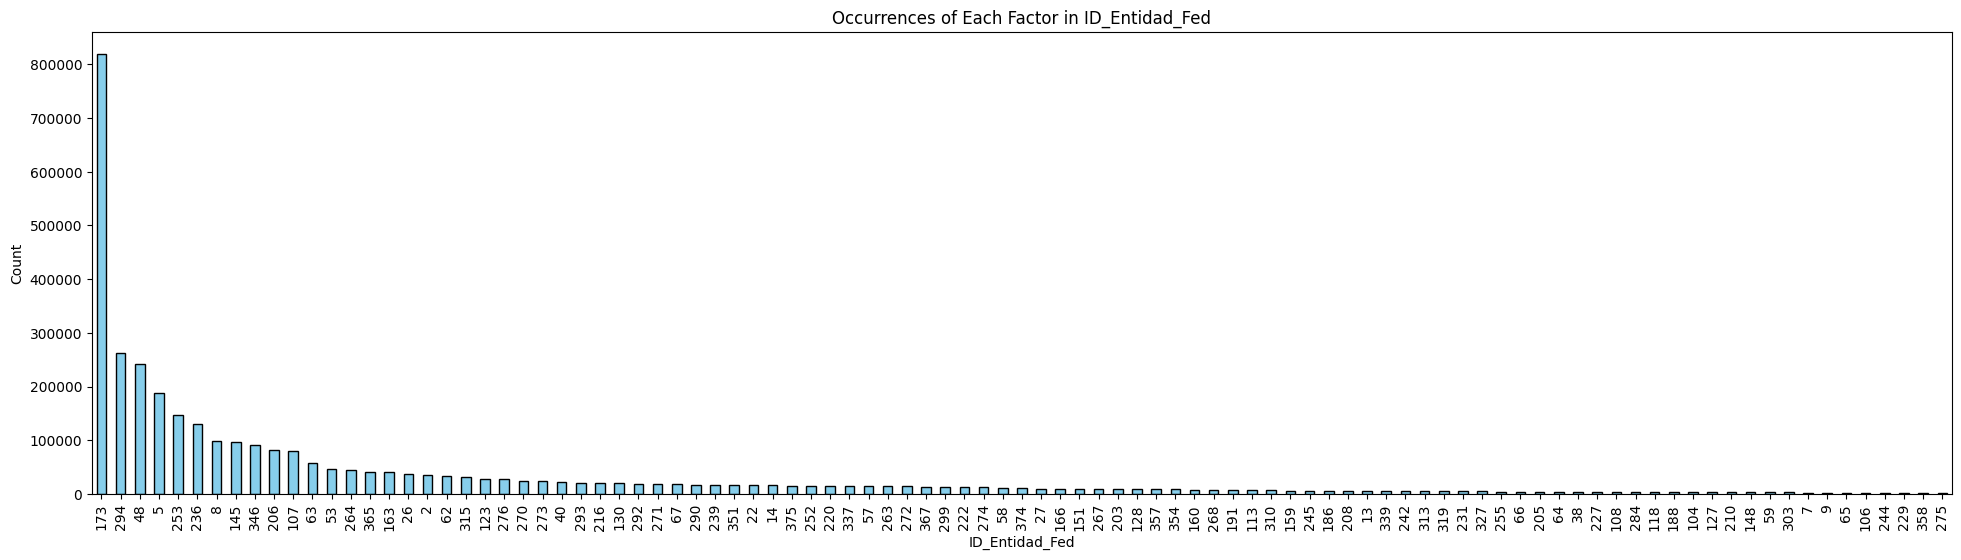

In [16]:
histogram(df["ID_Entidad_Fed"], "ID_Entidad_Fed", 2000)

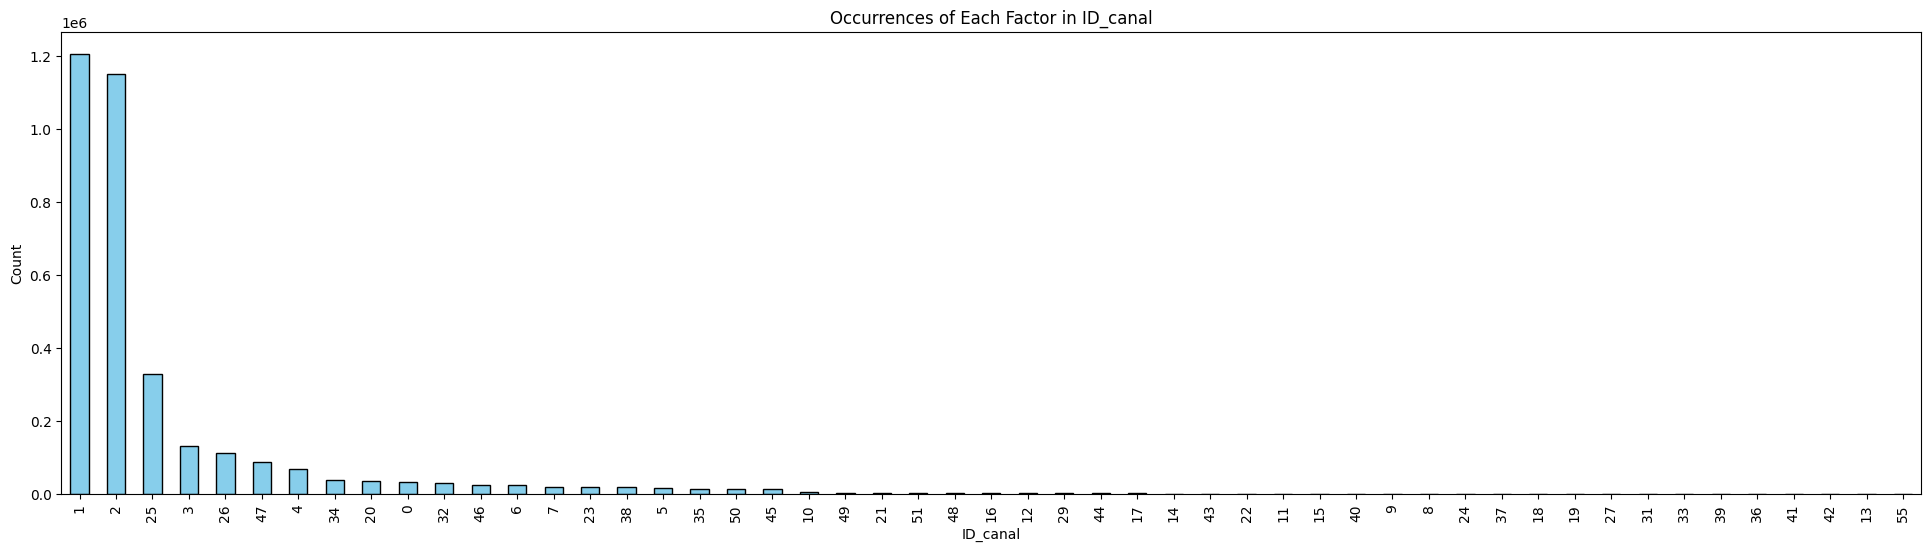

In [17]:
histogram(df["ID_canal"], "ID_canal")

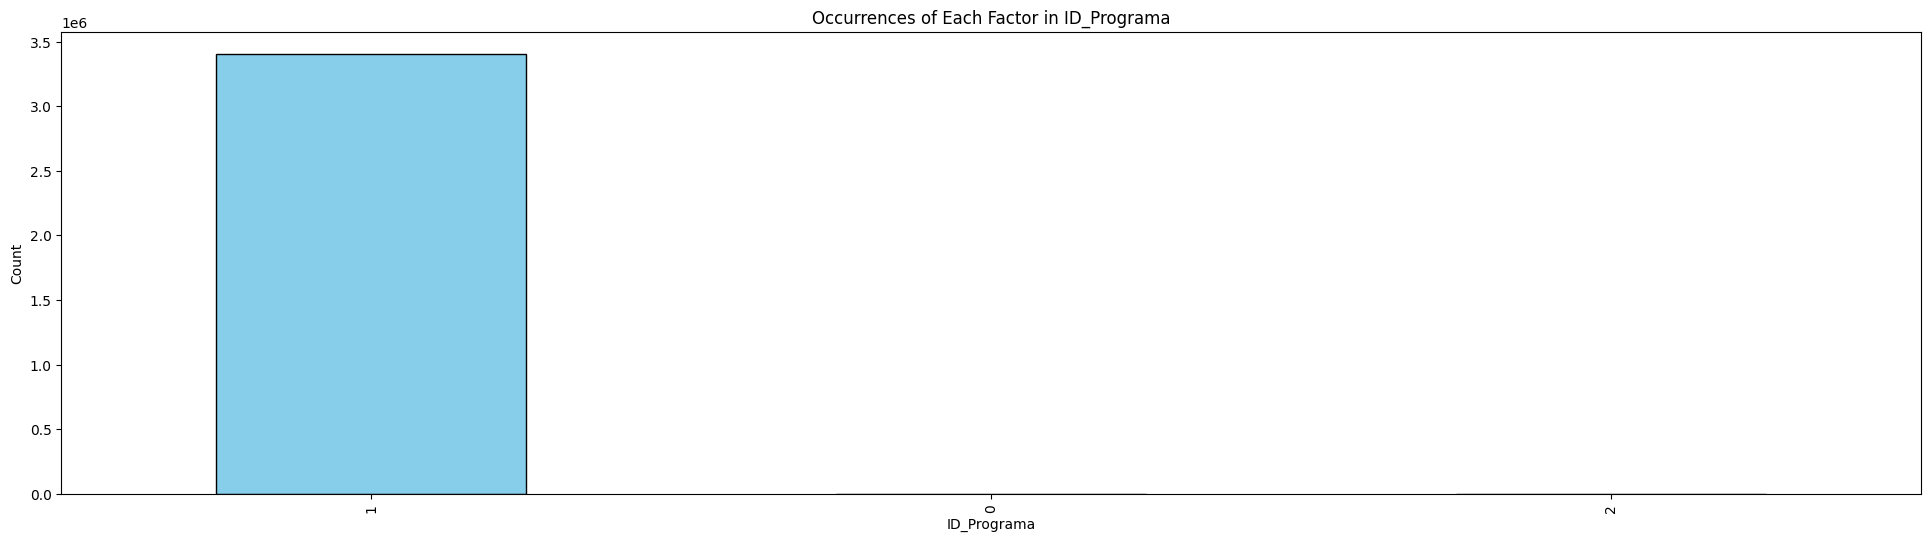

In [18]:
histogram(df["ID_Programa"], "ID_Programa")

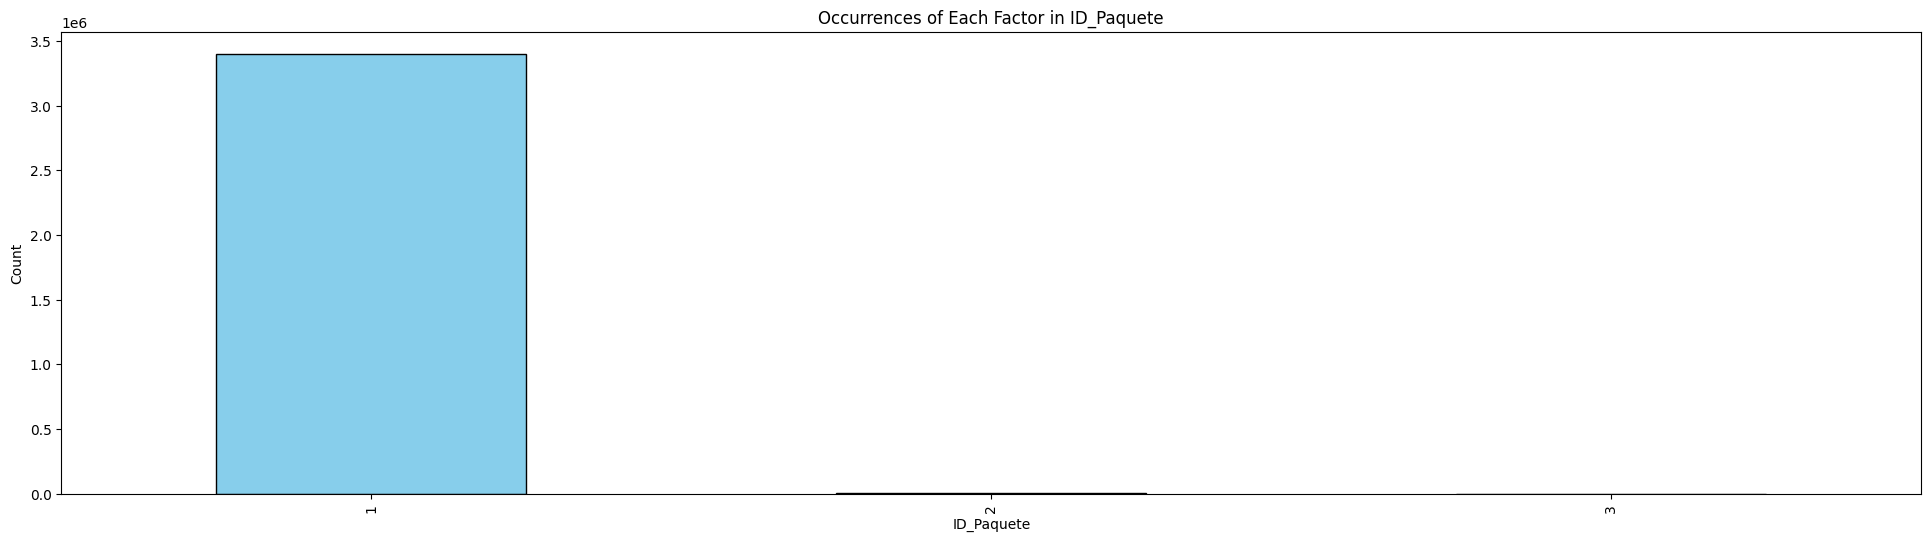

In [19]:
histogram(df["ID_Paquete"], "ID_Paquete")

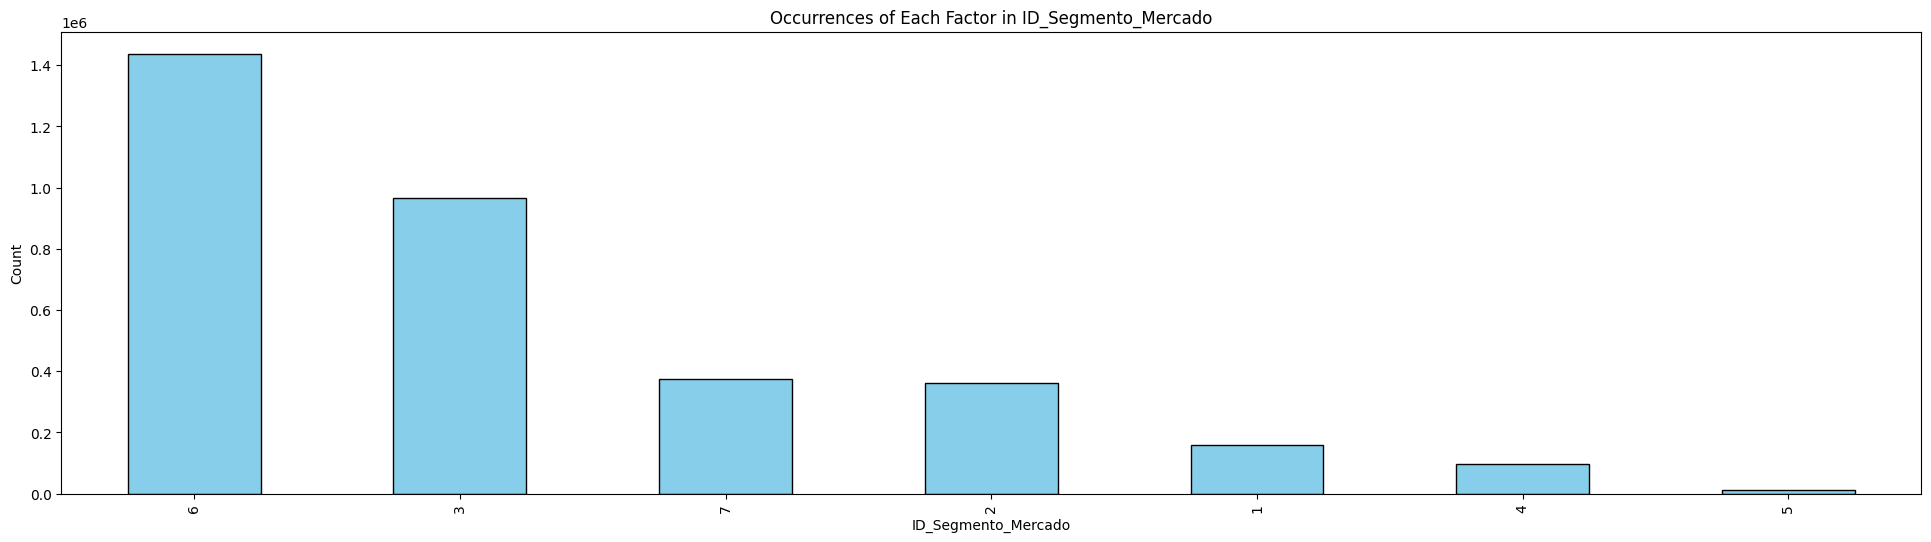

In [20]:
histogram(df["ID_Segmento_Mercado"], "ID_Segmento_Mercado")

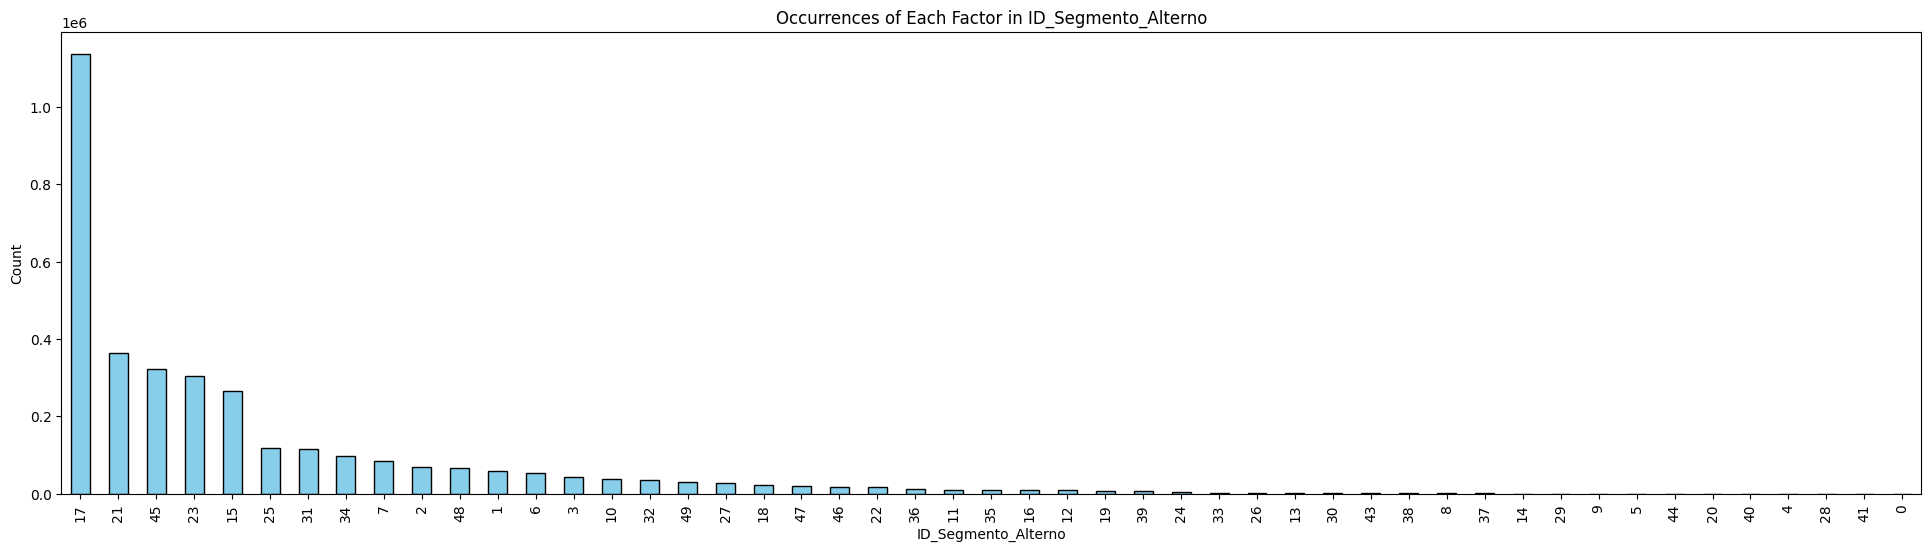

In [21]:
histogram(df["ID_Segmento_Alterno"], "ID_Segmento_Alterno")

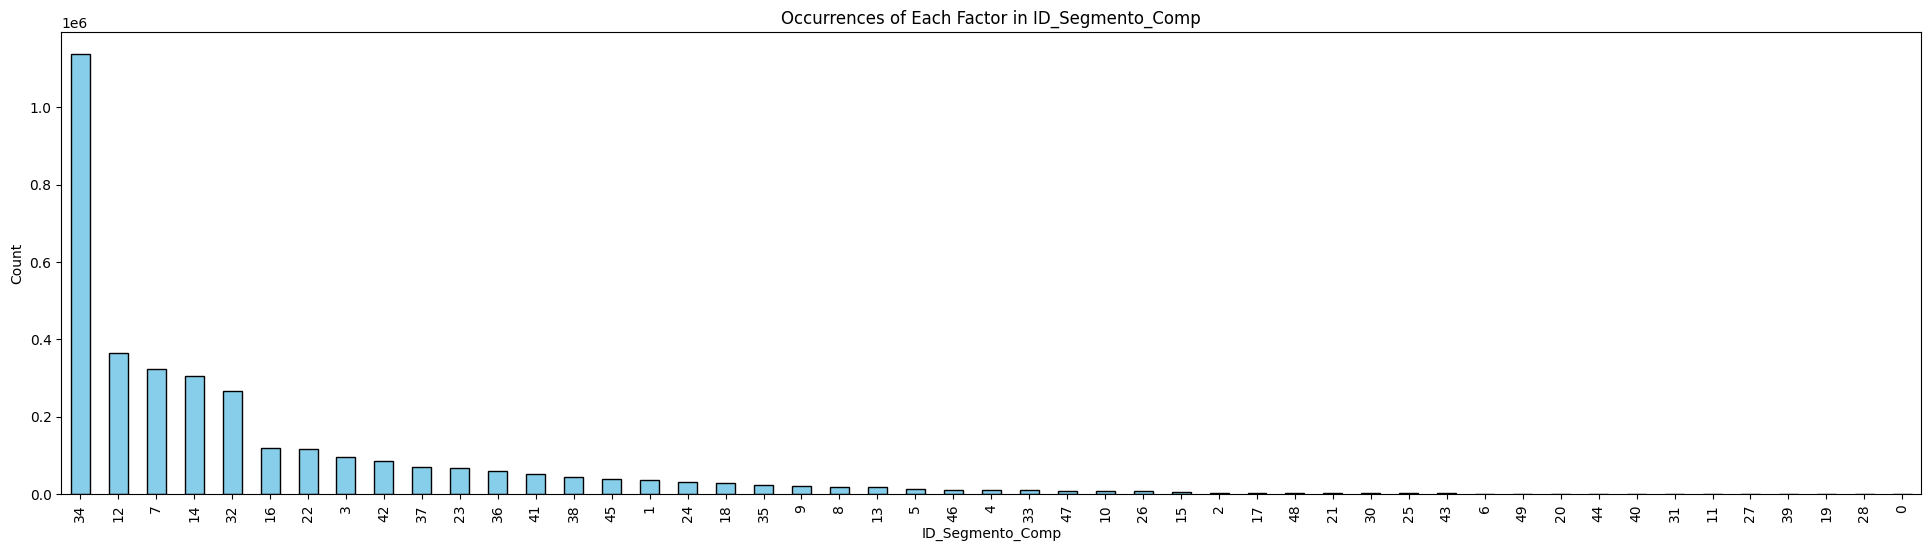

In [22]:
histogram(df["ID_Segmento_Comp"], "ID_Segmento_Comp")

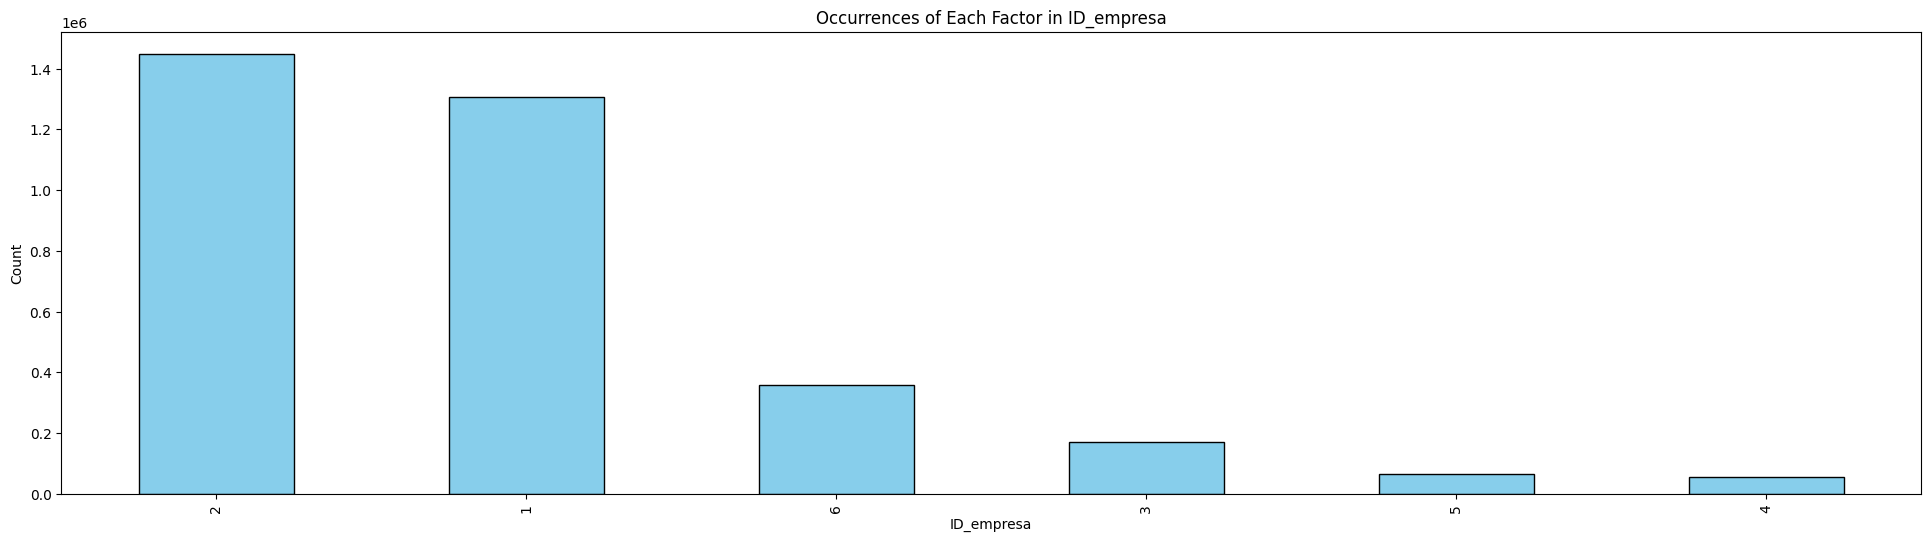

In [23]:
histogram(df["ID_empresa"], "ID_empresa")

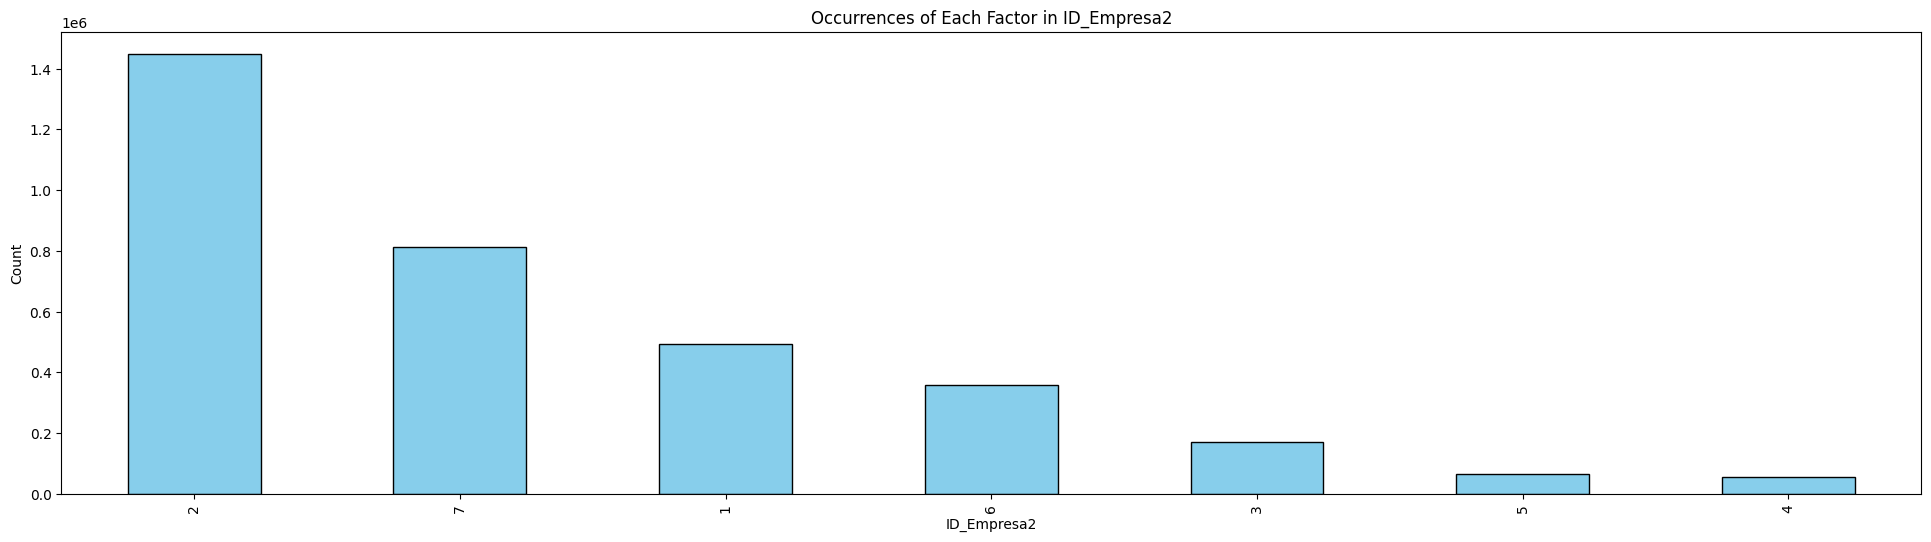

In [24]:
histogram(df["ID_Empresa2"], "ID_Empresa2")

#### Matrices de Correlación

In [25]:
df_original = df2.copy()
df_sample = df_original.sample(frac=0.05, random_state=52)  # Adjust the fraction as needed
df_sample = df_sample.loc[:, df_sample.sum() != 0] # Remove columns with only 0s

In [26]:
# Separamos los ID's del df
df_id = df_sample.filter(regex="ID")
df_non_id = df_sample.loc[:, ~df_sample.columns.str.contains("ID|aa")]

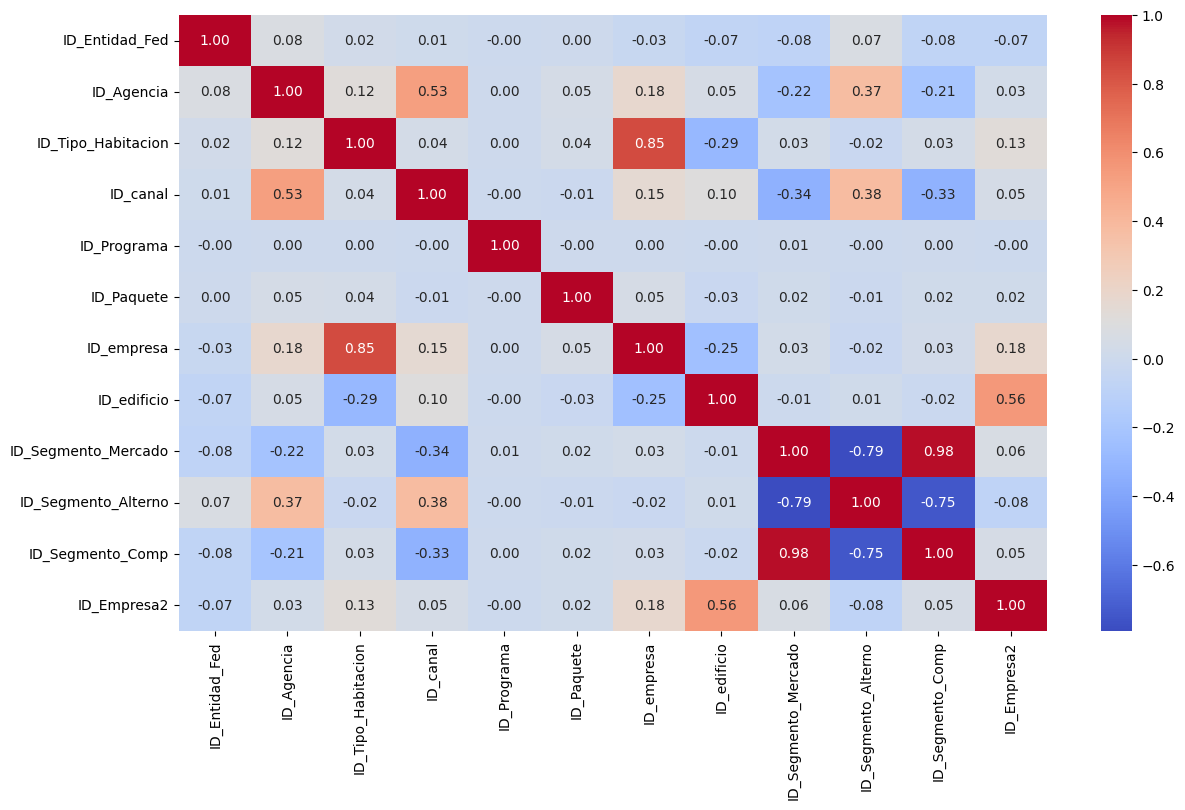

In [27]:
# Correlation Matrix ID's
plt.figure(figsize=(14, 8))
sns.heatmap(df_id.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

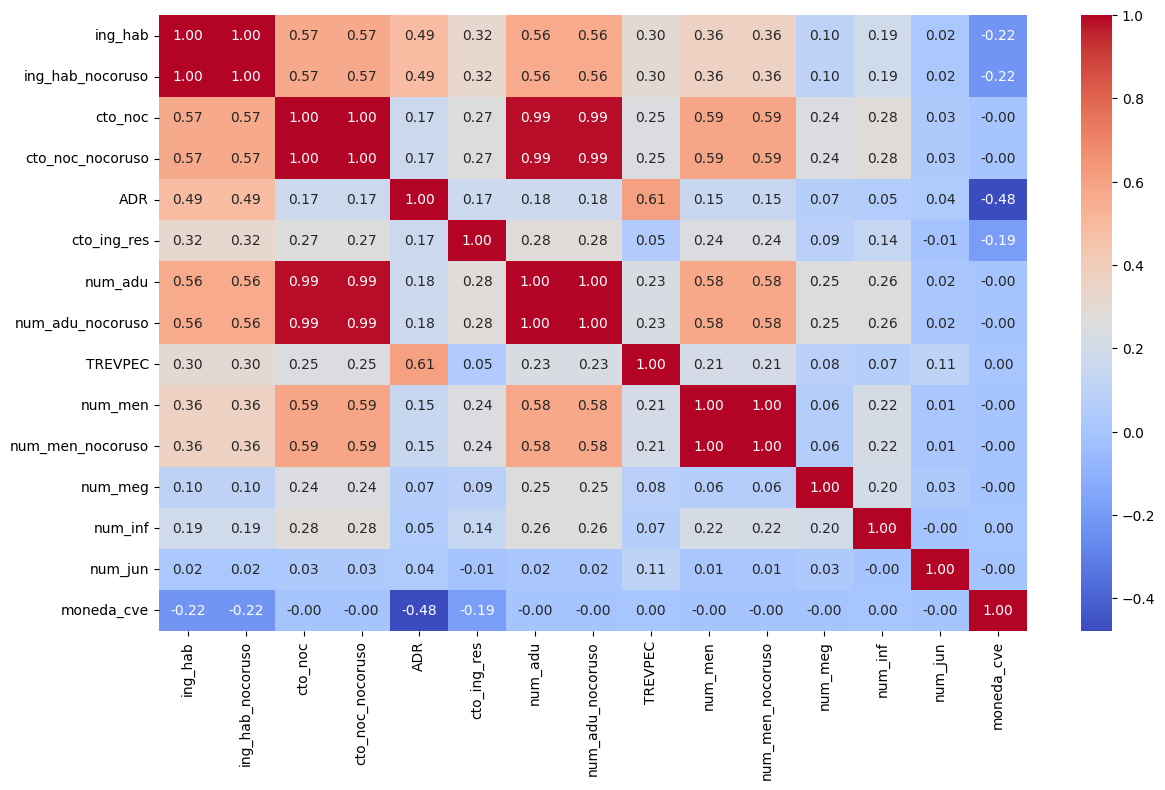

In [28]:
# Correlation Matrix for non ID
plt.figure(figsize=(14, 8))
sns.heatmap(df_non_id.iloc[:,1:].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

In [43]:
newDf = df2.copy()

newDf = newDf.drop_duplicates()
newDf['Fecha_hoy'] = pd.to_datetime(newDf['Fecha_hoy'])
newDf = newDf[newDf['moneda_cve'] != 1]

newdf_num = newDf[['Fecha_hoy', 'ing_hab']]
newdf_num['daily'] = newDf['Fecha_hoy'].dt.strftime('%Y-%m-%d')
newdf_num = newdf_num.drop("Fecha_hoy", axis=1)

newdf_num = newdf_num.groupby(by="daily").agg({
    'ing_hab': 'sum'
})
newdf_num.reset_index(inplace=True)
newdf_num['daily'] = pd.to_datetime(newdf_num['daily'], errors='coerce')

df_ent = newDf[['Fecha_hoy', 'ing_hab','ID_Entidad_Fed']]
df_ent['daily'] = newDf['Fecha_hoy'].dt.strftime('%Y-%m-%d')
df_ent = df_ent.drop("Fecha_hoy", axis=1)



/var/folders/jh/wqv8k9v13k7_v10t9h68wrbh0000gn/T/ipykernel_38947/2383923165.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/jh/wqv8k9v13k7_v10t9h68wrbh0000gn/T/ipykernel_38947/2383923165.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



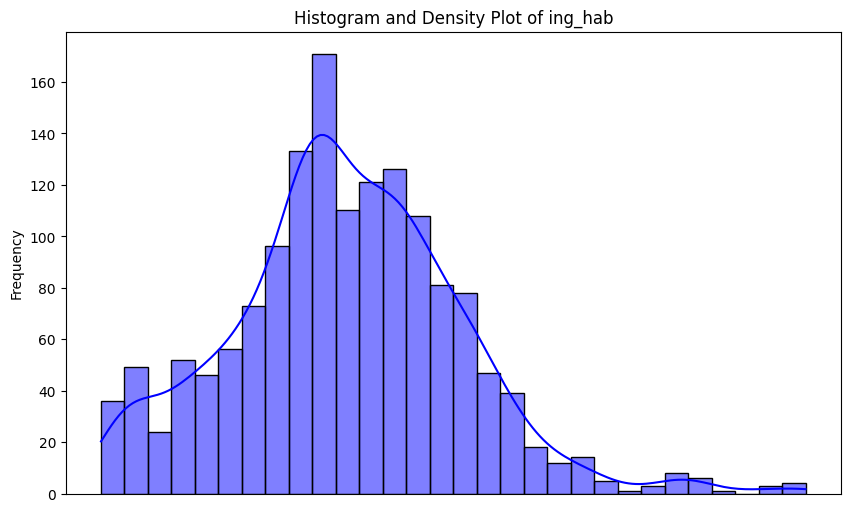

In [34]:
plt.figure(figsize=(10, 6))
sns.histplot(newdf_num['ing_hab'], kde=True, bins=30, color='blue')
plt.title('Histogram and Density Plot of ing_hab')
plt.xlabel('ing_hab')
plt.ylabel('Frequency')
plt.gca().get_xaxis().set_visible(False)  # Ocultar el eje x
plt.show()

<Figure size 640x480 with 0 Axes>

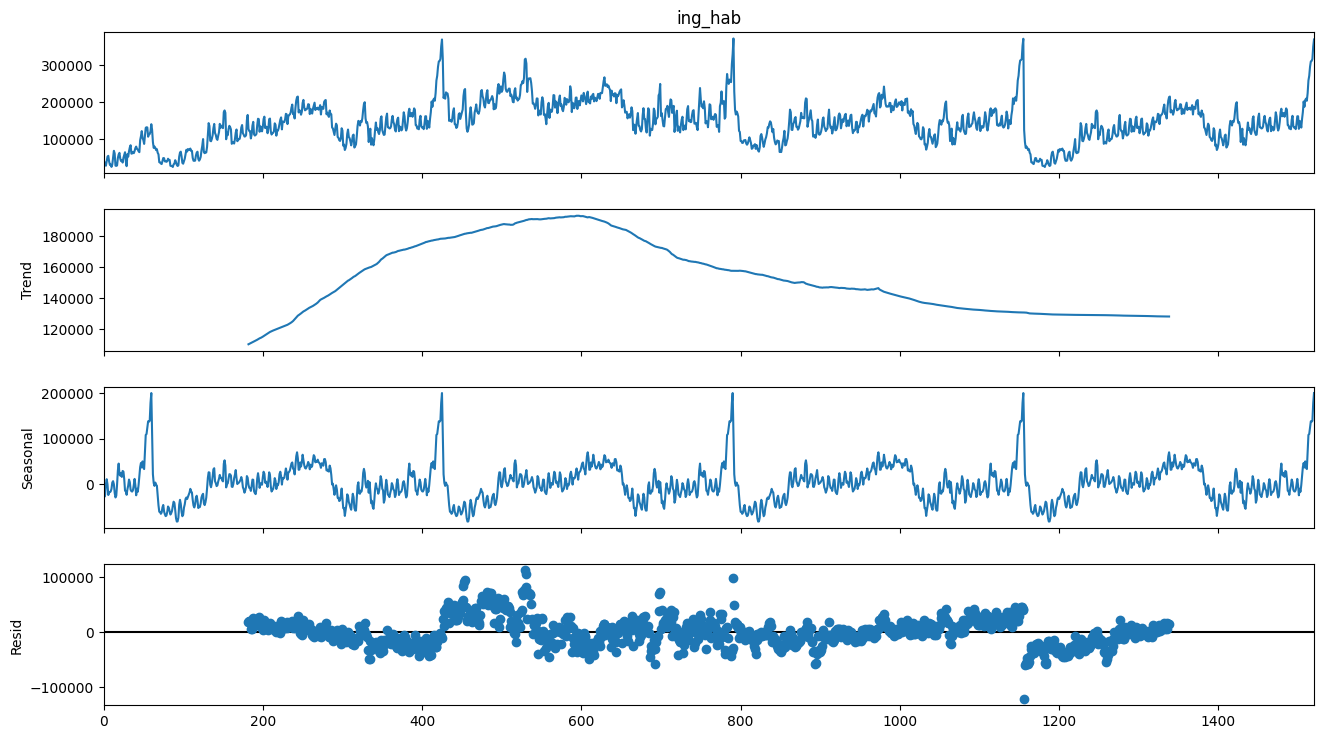

In [36]:
decomposition = seasonal_decompose(newdf_num['ing_hab'], period=365)  
fig = plt.figure()  
fig = decomposition.plot()
fig.set_size_inches(15, 8)

In [37]:
newdf_num['moving_avg'] = newdf_num['ing_hab'].rolling(window=7).mean()

In [42]:
import plotly.graph_objects as go

# Set a fixed y-axis range (adjust based on your data)
y_min = min(newdf_num[['moving_avg', 'ing_hab']].min())  # Minimum across both columns
y_max = max(newdf_num[['moving_avg', 'ing_hab']].max())  # Maximum across both columns

# Create the base figure
fig = go.Figure()

# Add the first column trace (initial trace)
fig.add_trace(
    go.Scatter(
        x=newdf_num['daily'],
        y=newdf_num['moving_avg'],
        mode='lines',
        name='Moving Avg'
    )
)

# Add the second column trace (hidden initially)
fig.add_trace(
    go.Scatter(
        x=newdf_num['daily'],
        y=newdf_num['ing_hab'],
        mode='lines',
        name='Ing_hab',
        visible=False  # Start with this trace hidden
    )
)

# Update the layout to remove axis labels, tick labels, and grid lines
fig.update_layout(
    updatemenus=[
        dict(
            type="dropdown",
            showactive=True,
            buttons=[
                dict(
                    label="Moving Avg",
                    method="update",
                    args=[
                        {"visible": [True, False]},  # Show first trace, hide second
                        {
                            "title": "Time Series of Moving Avg Over Time",
                            "annotations": [
                                dict(
                                    x=0.5,
                                    y=-0.2,
                                    showarrow=False,
                                    text="You selected: Moving Avg",
                                    xref="paper",
                                    yref="paper",
                                    font=dict(size=14)
                                )
                            ]
                        }
                    ]
                ),
                dict(
                    label="Ing_hab",
                    method="update",
                    args=[
                        {"visible": [False, True]},  # Hide first trace, show second
                        {
                            "title": "Time Series of Ing_hab Over Time",
                            "annotations": [
                                dict(
                                    x=0.5,
                                    y=-0.2,
                                    showarrow=False,
                                    text="You selected: Ing_hab",
                                    xref="paper",
                                    yref="paper",
                                    font=dict(size=14)
                                )
                            ]
                        }
                    ]
                )
            ],
            direction="down",  # Dropdown direction
            x=0.5,  # X position of the dropdown
            xanchor="center",
            y=1.15,  # Y position of the dropdown
            yanchor="top"
        )
    ],
    title="Time Series Plot with Dropdown",
    xaxis=dict(
        title='',  # Remove x-axis title
        showticklabels=False,  # Remove x-axis tick labels
        showgrid=False,       # Remove x-axis grid lines
        range=[newdf_num['daily'].min(), newdf_num['daily'].max()],
        dtick='M3',
        tickformat='%Y-%m',
        tickangle=45
    ),
    yaxis=dict(
        title='',  # Remove y-axis title
        showticklabels=False,  # Remove y-axis tick labels
        showgrid=False,        # Remove y-axis grid lines
        range=[y_min, y_max]  # Fixed y-axis range
    ),
    width=900,
    height=500,
    annotations=[  # Initial annotation
        dict(
            x=0.5,
            y=-0.2,
            showarrow=False,
            text="You selected: Moving Avg",
            xref="paper",
            yref="paper",
            font=dict(size=14)
        )
    ]
)

# Show the plot
fig.show()


In [46]:
# Get the total sum of 'ing_hab' for all data
total_sum = df_ent['ing_hab'].sum()
# Get the sum of 'ing_hab' grouped by 'ID_Entidad_Fed'
sum_by_entidad = df_ent.groupby('ID_Entidad_Fed')['ing_hab'].sum().reset_index()
# Calculate the percentage of the total sum for each 'ID_Entidad_Fed'
sum_by_entidad['percentage_of_total'] = (sum_by_entidad['ing_hab'] / total_sum) * 100
# Sort by percentage in descending order
sum_by_entidad = sum_by_entidad.sort_values(by='percentage_of_total', ascending=False)
# Print the result
sum_by_entidad

,ID_Entidad_Fed,ing_hab,percentage_of_total
112,173,5.656087e+07,25.558707
194,294,2.309883e+07,10.437889
39,48,1.548702e+07,6.998269
5,5,1.359379e+07,6.142758
162,253,1.265173e+07,5.717060
...,...,...,...
118,182,4.852218e+02,0.000219
6,6,4.386322e+02,0.000198
210,316,3.376167e+02,0.000153
250,377,3.266416e+02,0.000148


In [47]:
# Calculate cumulative percentage
sum_by_entidad['cumulative_percentage'] = sum_by_entidad['percentage_of_total'].cumsum()

# Select the top entities that sum to 80% of 'ing_hab'
top_80_percent = sum_by_entidad[sum_by_entidad['cumulative_percentage'] <= 80]

# Print the result
top_80_percent

,ID_Entidad_Fed,ing_hab,percentage_of_total,cumulative_percentage
112,173,5.656087e+07,25.558707,25.558707
194,294,2.309883e+07,10.437889,35.996596
39,48,1.548702e+07,6.998269,42.994865
5,5,1.359379e+07,6.142758,49.137623
162,253,1.265173e+07,5.717060,54.854683
8,8,1.252680e+07,5.660607,60.515290
150,236,7.318203e+06,3.306947,63.822238
228,346,5.756024e+06,2.601030,66.423268
89,145,5.307946e+06,2.398553,68.821821
66,107,4.414420e+06,1.994787,70.816607


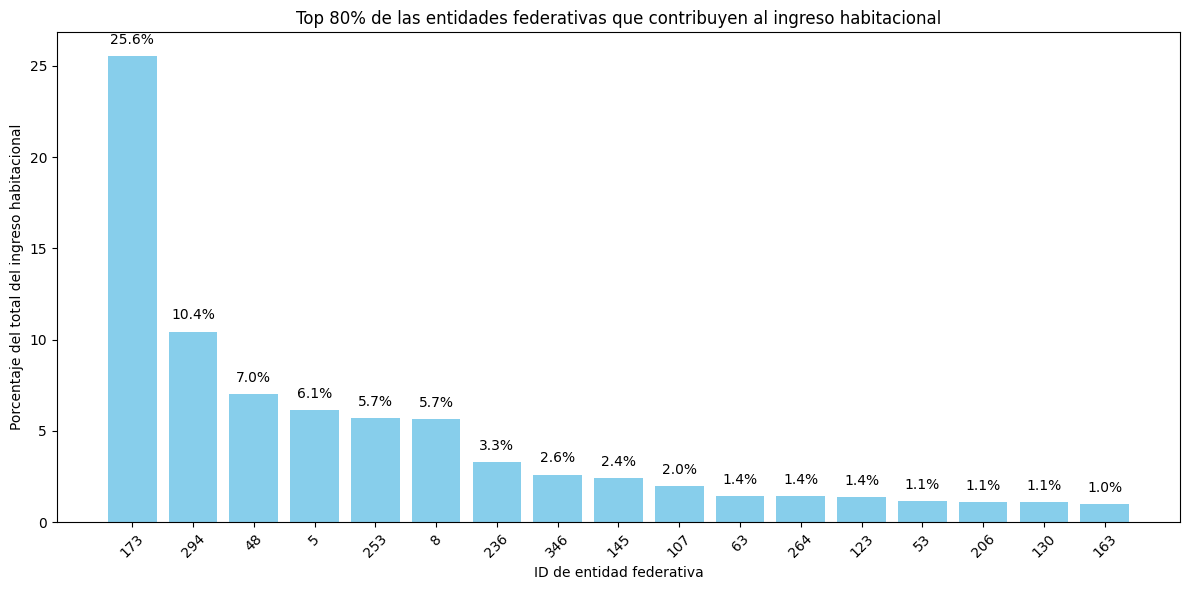

In [53]:
# Assuming previous code has been run and 'top_80_percent' DataFrame is available

# Convert 'ID_Entidad_Fed' to string data type
top_80_percent['ID_Entidad_Fed'] = top_80_percent['ID_Entidad_Fed'].astype(str)

# Sort the data (optional)
top_80_percent = top_80_percent.sort_values(by='percentage_of_total', ascending=False)

# Plot a bar graph
plt.figure(figsize=(12, 6))
bars = plt.bar(top_80_percent['ID_Entidad_Fed'], top_80_percent['percentage_of_total'], color='skyblue')

# Add percentage labels on top of each bar (optional)
for bar, percentage in zip(bars, top_80_percent['percentage_of_total']):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.5, f"{percentage:.1f}%", ha='center', va='bottom')

# Add labels and title
plt.xlabel('ID de entidad federativa')
plt.ylabel('Porcentaje del total del ingreso habitacional')
plt.title('Top 80% de las entidades federativas que contribuyen al ingreso habitacional')

# Rotate x-axis labels if necessary
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()



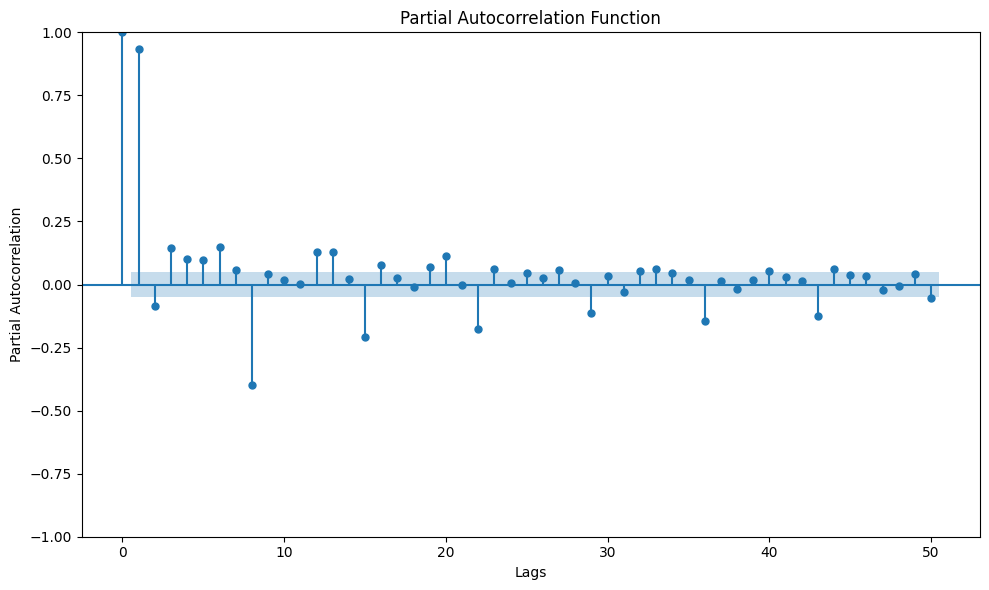

In [54]:
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf

# Calculate PACF values
time_series = newdf_num['ing_hab']

# Plot PACF
plt.figure(figsize=(10, 6))
plot_pacf(time_series, lags=50, method='ywmle', ax=plt.gca())
plt.title('Partial Autocorrelation Function')
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.tight_layout()
plt.show()